# Predicting Heart Disease

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5 CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

We are going to use a dataset of 11 features that can be used to predict a possible heart disease.

# Loading in the dataset

In [1]:
import pandas as pd
import numpy as np
heart_data = pd.read_csv(r'C:\Users\nbnav\OneDrive\Desktop\Dataquest\heart_disease.csv')
print(heart_data.head())
print(heart_data.shape)

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
(918, 12)


We have 11 features in our dataset, 918 observations and 1 target variable.

In [2]:
print(heart_data.isna().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Our dataset contains no null values.

The description from the source of the data tells us the following information about the features:

* Age: age of the patient [years]

* Sex: sex of the patient [M: Male, F: Female]

* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

* RestingBP: resting blood pressure [mm Hg]

* Cholesterol: serum cholesterol [mg/dl]

* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

* Oldpeak: oldpeak = ST [Numeric value measured in depression]

* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

* HeartDisease: output class [1: heart disease, 0: Normal]

Let's explore and analyze the columns of our dataset and see if we find any anomalies.

In [3]:
print(heart_data.dtypes)
print(heart_data.describe())

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  91

The minimum of RestingBP and Cholestrol at 0 is unlikely and requires further investigating the columns. The mean of cholestrol at 198 is significantly lower than the median at 223 which indicates that the distribution is skewed to the left (negatively skewed) or has outliers on the left side.

Before we investigate the above two columns, let's visualize the number of rows for each category of a categorical column(including FastingBS and HeartDisease). 

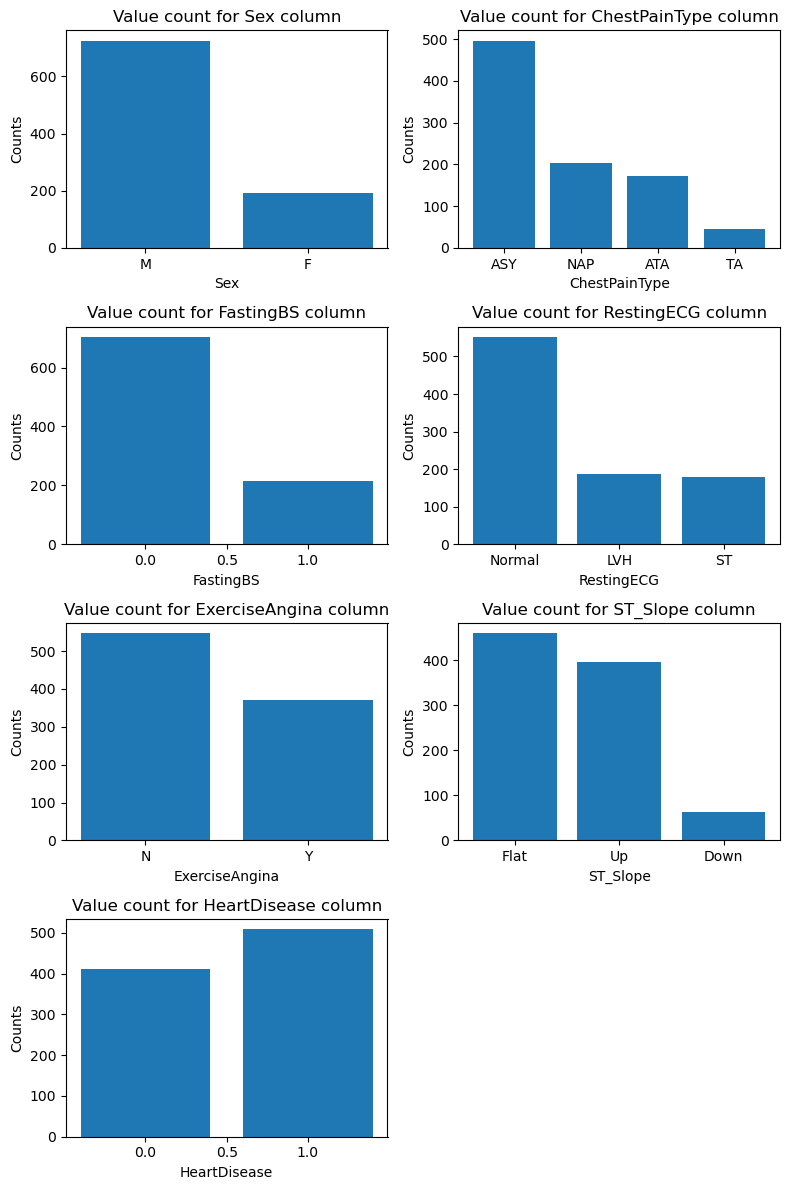

In [4]:
import matplotlib.pyplot as plt

columns = ['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope','HeartDisease']

fig, axes = plt.subplots(4, 2, figsize=(8, 12))

for i, column in enumerate(columns):
    row = i // 2
    col = i % 2

    unique_labels = heart_data[column].value_counts().index
    label_counts = heart_data[column].value_counts().values

    axes[row, col].bar(unique_labels, label_counts)
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Counts')
    axes[row, col].set_title(f'Value count for {column} column')

# Hide any empty subplots
if len(columns) % 2 != 0:
    axes[-1, -1].axis('off')

plt.tight_layout()
plt.show()  

Glanicing at the plots, we can spot that -

* Most of our observations belongs to the 'male' gender.(700~ males, 200~ females)

* Most patients have asymptomatic chest pain.

* Most patients do not have blood sugar

* Majority of the patients have been classified having heart disease.

The dataset is highly skewed towards male patients. 725 rows correspond to male patients, whereas only 193 correspond to female patients. This could potentially induce a bias in our model and impact predictions for any female patients in any unseen data.

Let's visualize the number of rows for each category of a categorical column grouped by HeartDisease.

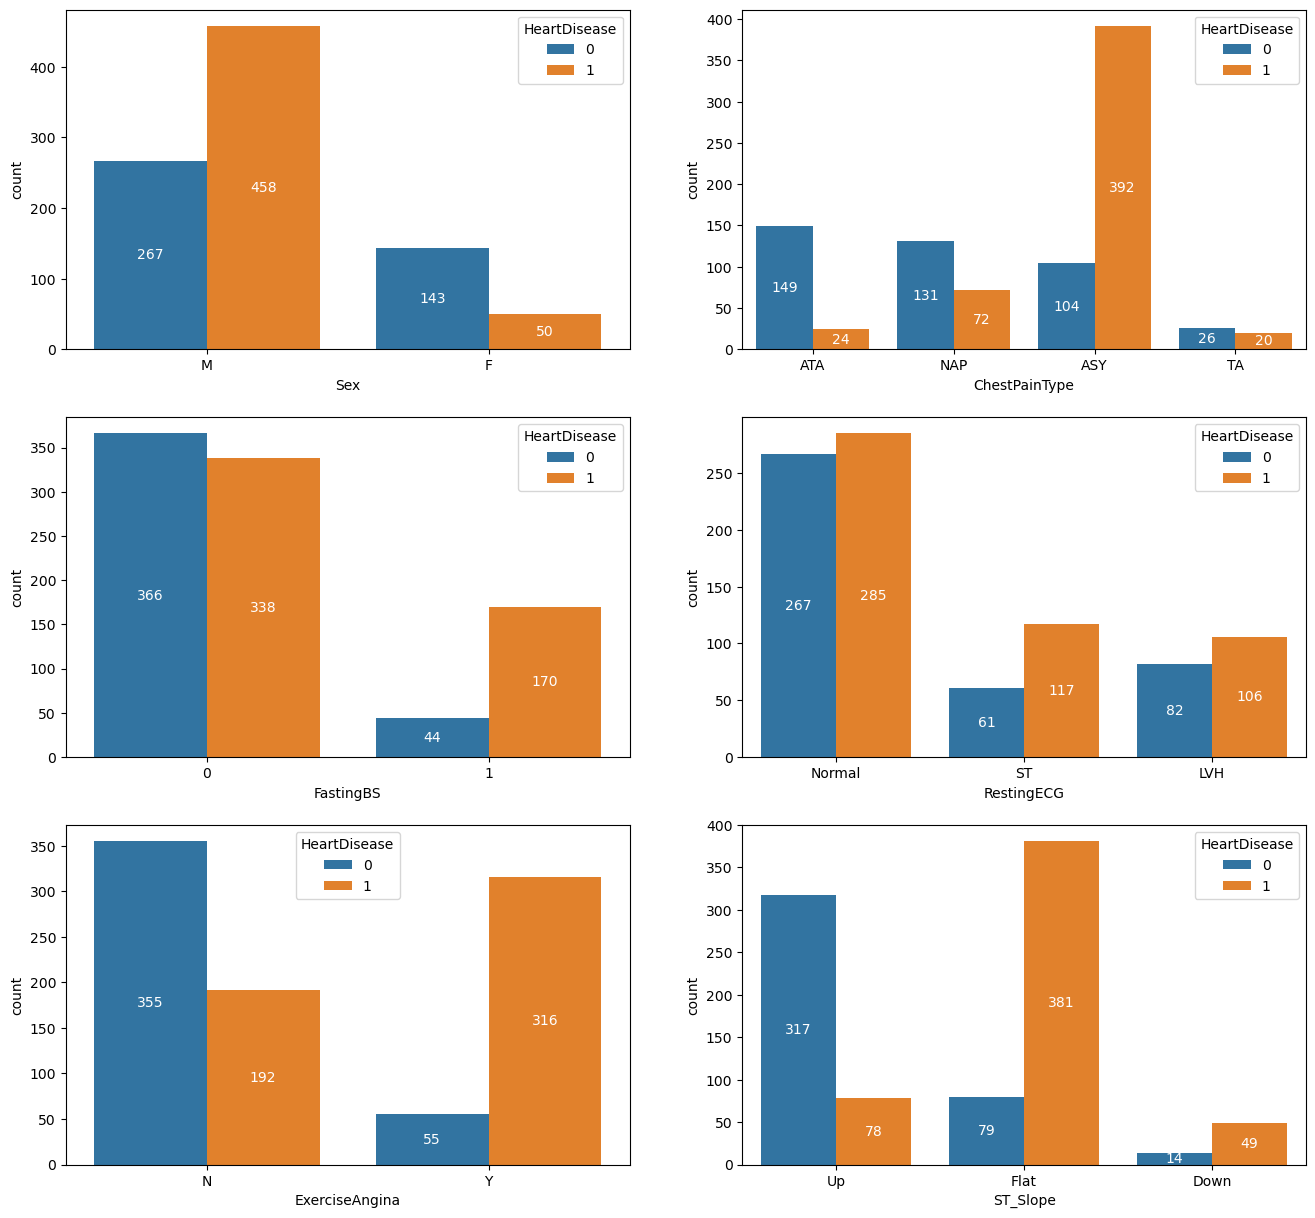

In [5]:
import seaborn as sns
columns = ['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope']
fig = plt.figure(figsize=(16,15))

for idx, col in enumerate(columns):
    ax = plt.subplot(3, 2, idx+1)
    # group by HeartDisease
    sns.countplot(x=heart_data[col], hue=heart_data["HeartDisease"], ax=ax)
    # add data labels to each bar
    for container in ax.containers:
        ax.bar_label(container, label_type="center", color='white')

Some very interesting findings that we could gather from above plots:

* The number of males that have Heart disease is way higher than females but this was expected since the number of males in the dataset is way higher. Even after considering this fact, the number of females with Heart disease is very low(50).

* Most patients with a Heart disease are Asymptomatic! i.e. they have no complaints of chest pain.

* When you do not have high blood sugar, the chances of having Heart disease remains equal but having high blood sugar increases your chances of having Heart disease.

* Having a normal RestingECG does not decreases your chances of having Heart disease. Your chances of Heart disease increase with an abnormal ECG but not by a big margin.

* The chances of Heart disease increases many fold if you experience anginal pain after exercise.

* Having a flat or downward ST slope increases your chances of having heart disease.

Now that we have analyzed our categorical columns, let's move back to our numerical columns of RestingBP and Cholesterol where we found minimum values of 0 which were unlikely and wrong. If only some of the values are 0, we would remove those entire rows, otherewise we would use the median of the column grouped by HeartDisease to fill the zero values.

In [6]:
wrong_data = heart_data[heart_data['RestingBP'] == 0]
print(wrong_data)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
449   55   M           NAP          0            0          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
449    155              N      1.5     Flat             1  


In [7]:
wrong_data_c = heart_data[heart_data['Cholesterol'] == 0]
print(wrong_data_c)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
293   65   M           ASY        115            0          0     Normal   
294   32   M            TA         95            0          1     Normal   
295   61   M           ASY        105            0          1     Normal   
296   50   M           ASY        145            0          1     Normal   
297   57   M           ASY        110            0          1         ST   
..   ...  ..           ...        ...          ...        ...        ...   
514   43   M           ASY        122            0          0     Normal   
515   63   M           NAP        130            0          1         ST   
518   48   M           NAP        102            0          1         ST   
535   56   M           ASY        130            0          0        LVH   
536   62   M           NAP        133            0          1         ST   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
293     93              Y  

While we only have one row in RestingBP where the value is 0, there are 172 rows in Cholesterol that have null value. Deleting all these rows would make our dataset significantly smaller and could potentially result in a loss of valuable information and statistical power in our analysis.

We will group the observations which have 0 value in Cholesterol column and fill it with the median of that column. The column we will group our observations with is 'HeartDisease'.

In [8]:
heart_data_clean = heart_data.copy()
heart_data_clean = heart_data_clean[heart_data_clean['RestingBP'] != 0]

In [9]:
print(heart_data_clean.shape)

(917, 12)


In [10]:
heart_disease_mask = heart_data_clean['HeartDisease'] == 0

median_1 = heart_data_clean.loc[heart_disease_mask, 'Cholesterol'].median()
median_2 = heart_data_clean.loc[~heart_disease_mask, 'Cholesterol'].median()

print(median_1)
print(median_2)

227.0
217.0


In [11]:
heart_data_clean.loc[heart_disease_mask, 'Cholesterol'] = heart_data_clean.loc[heart_disease_mask, 'Cholesterol'].replace(to_replace = 0, value=median_1)
heart_data_clean.loc[~heart_disease_mask, 'Cholesterol'] = heart_data_clean.loc[~heart_disease_mask, 'Cholesterol'].replace(to_replace = 0, value=median_2)

In [12]:
heart_data_clean[['RestingBP', 'Cholesterol']].describe()

,RestingBP,Cholesterol
count,917.000000,917.000000
mean,132.540894,239.700109
std,17.999749,54.352727
min,80.000000,85.000000
25%,120.000000,214.000000
50%,130.000000,225.000000
75%,140.000000,267.000000
max,200.000000,603.000000


None of the values in our RestingBP and Cholesterol columns are now zero. Also the mean is now significantly closer to the median in the Cholesterol column. Apparently those wrong zero values were causing the distribution to be negatively skewed. 

Let's now visualize our numerical columns and see if we could obtain any findings. We would first need to equally categorize each numerical column into equal parts.

In [13]:
numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

categories = pd.DataFrame()

for column in numeric_columns:
    categories[column] = pd.cut(heart_data_clean[column], bins=5)
    
print(categories.head())

              Age       RestingBP      Cholesterol           MaxHR  \
0    (37.8, 47.6]  (128.0, 152.0]   (188.6, 292.2]  (145.2, 173.6]   
1    (47.6, 57.4]  (152.0, 176.0]  (84.482, 188.6]  (145.2, 173.6]   
2  (27.951, 37.8]  (128.0, 152.0]   (188.6, 292.2]   (88.4, 116.8]   
3    (47.6, 57.4]  (128.0, 152.0]   (188.6, 292.2]   (88.4, 116.8]   
4    (47.6, 57.4]  (128.0, 152.0]   (188.6, 292.2]  (116.8, 145.2]   

         Oldpeak  
0  (-0.84, 0.92]  
1   (0.92, 2.68]  
2  (-0.84, 0.92]  
3   (0.92, 2.68]  
4  (-0.84, 0.92]  


In [14]:
categories['HeartDisease'] = heart_data_clean['HeartDisease']

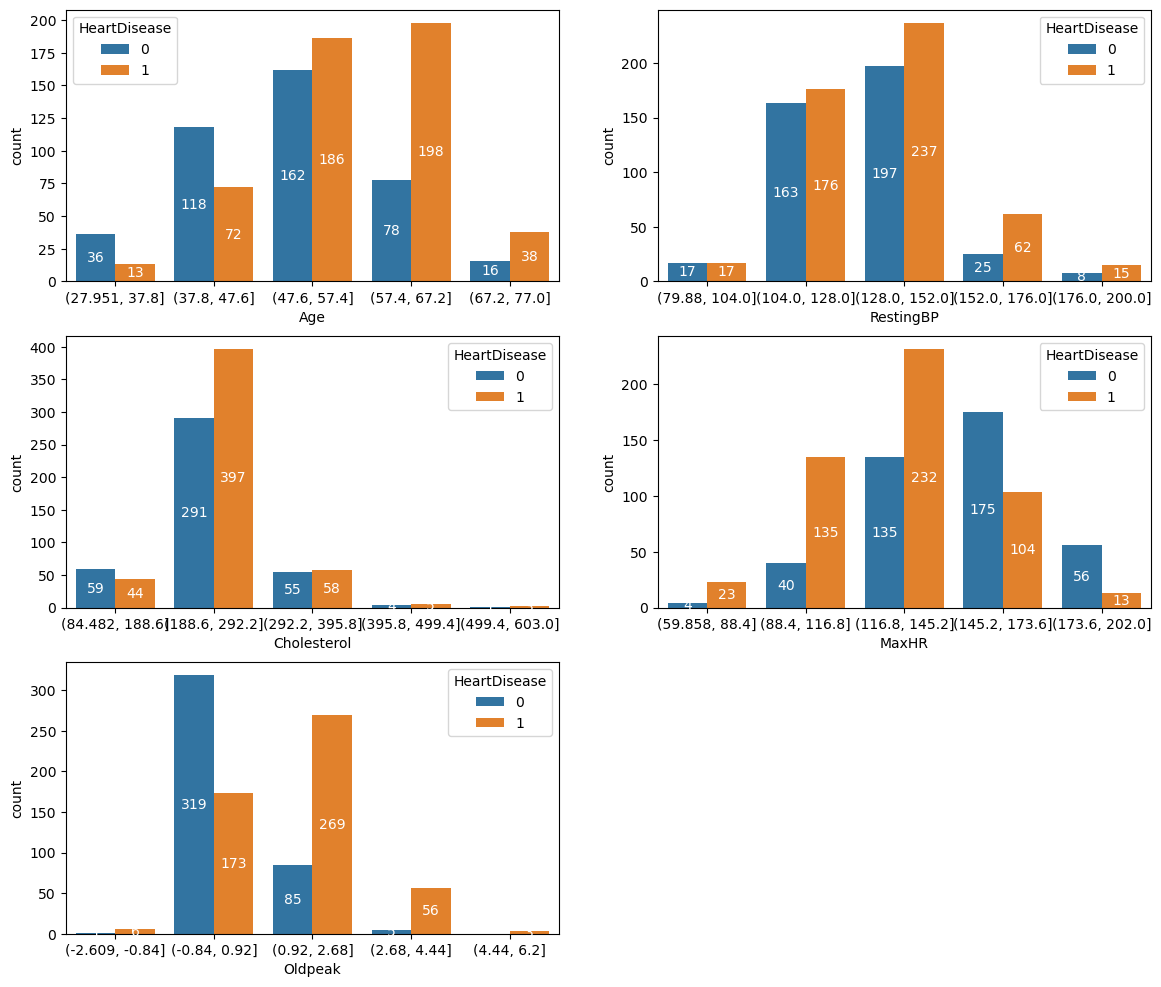

In [15]:
fig = plt.figure(figsize=(14, 12))

for i, col in enumerate(numeric_columns):
    ax = plt.subplot(3, 2, i+1)
    sns.countplot(x=categories[col], hue=categories['HeartDisease'], ax=ax)
    for container in ax.containers:
        ax.bar_label(container, label_type='center', color='white')

Some observations-

* The chances of getting Heart Disease increase with age.

* Increase in BP increase chances of Heart Disease but not significantly.

* There are very few outliers in the Cholesterol column on the right side.

* An increase in MaxHR decreae your chances of Heart Disease.

* An Oldpeak of > 0.92 increase your chances of Heart Disease by many fold.

# Feature Selection

Now that we have cleaned our data and explored it a bit, we can now start preparing our data to fit into the model.

Thanks to our EDA, we have a general sense of which columns are closely related to our target variable. These are -

* <span style="background-color: silver; opacity: 0.8;">Sex</span>
* <span style="background-color: silver; opacity: 0.8;">ChestPaintype</span>
* <span style="background-color: silver; opacity: 0.8;">FastingBS</span>
* <span style="background-color: silver; opacity: 0.8;">ExerciseAngina</span>
* <span style="background-color: silver; opacity: 0.8;">ST_slope</span>
* <span style="background-color: silver; opacity: 0.8;">Age</span>
* <span style="background-color: silver; opacity: 0.8;">MaxHR</span>
* <span style="background-color: silver; opacity: 0.8;">Oldpeak</span>

We can now calculate the correlation of these columns with our target varibale and choose the top ones to include in our model. But first we will have to convert our categorical columns into dummy variables.

In [16]:
relevant_columns = ['Sex', 'ChestPainType', 'FastingBS', 'ExerciseAngina', 'ST_Slope', 'Age', 'MaxHR', 'Oldpeak',
                    'HeartDisease']

rel_heart_data = pd.DataFrame()
for column in relevant_columns:
    rel_heart_data[column] = heart_data_clean[column]
    
print(rel_heart_data.shape)

(917, 9)


In [17]:
rel_heart_data = pd.get_dummies(rel_heart_data)
print(rel_heart_data.head())

   FastingBS  Age  MaxHR  Oldpeak  HeartDisease  Sex_F  Sex_M  \
0          0   40    172      0.0             0      0      1   
1          0   49    156      1.0             1      1      0   
2          0   37     98      0.0             0      0      1   
3          0   48    108      1.5             1      1      0   
4          0   54    122      0.0             0      0      1   

   ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0                  0                  1                  0                 0   
1                  0                  0                  1                 0   
2                  0                  1                  0                 0   
3                  1                  0                  0                 0   
4                  0                  0                  1                 0   

   ExerciseAngina_N  ExerciseAngina_Y  ST_Slope_Down  ST_Slope_Flat  \
0                 1                 0              0     

Now let's find out the correlations between them.

<AxesSubplot:>

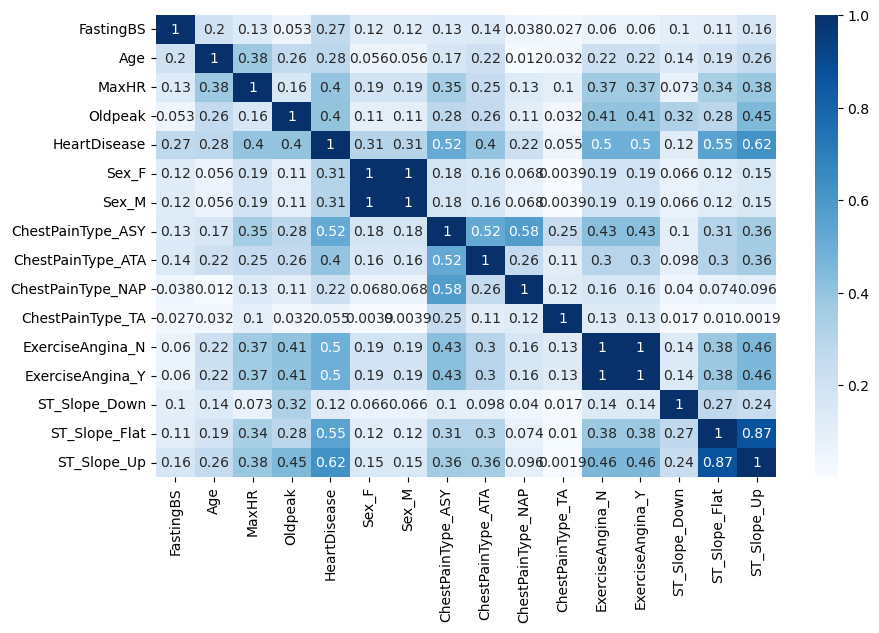

In [18]:
correlations = abs(rel_heart_data.corr())
plt.figure(figsize=(10, 6))
sns.heatmap(correlations, annot=True, cmap='Blues')

Given everything we have found so far, these feautres seems to be the best choice for our model-
* ST_Slope_Up
* ST_Slope_Flat
* ExerciseAngina_Y
* ChestPainType_ASY
* Oldpeak
* MaxHR

In [19]:
import warnings
warnings.filterwarnings("ignore")
heart_data_clean = pd.get_dummies(heart_data_clean)

# Building a classifier

Let's create a training set, validation set and a test set. After getting satisfied with the accuracy results on the validation set, we will run our model on the test set.

In [20]:
from sklearn.model_selection import train_test_split
X = heart_data_clean.drop('HeartDisease', axis=1)
y = heart_data_clean['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2 * (X.shape[0]/X_train.shape[0]))

Before we fit our data into the model, we will need to scale our features with the help of MinMaxScaler.

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

features = ["ST_Slope_Up", "ST_Slope_Flat", "ExerciseAngina_Y", "ChestPainType_ASY", "Oldpeak", "MaxHR"]
X_train_scaled = scaler.fit_transform(X_train[features])
X_val_scaled = scaler.transform(X_val[features])

Let's fit the training data into the model and test it's accuracy on the validation set.

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train_scaled, y_train)
accuracy = knn.score(X_val_scaled, y_val)

print(f'Accuracy of validation set: {accuracy*100:.2f}%')

Accuracy of validation set: 83.70%


We got an accuracy of more than 80% on our validation set(running it again may have the changed the accuracy a bit). Let's try some other different parameters for our classifier and use the best parameters to use on our test set.

# Hyperparameter Optimization

In [23]:
from sklearn.model_selection import GridSearchCV

grid_params = {'n_neighbors': [4, 8, 15, 22, 25, 30], 'p': [1, 2, 3, 4, 5]}

knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, grid_params, scoring='accuracy')
knn_grid.fit(X_train_scaled, y_train)

best_score = knn_grid.best_score_
best_parameters = knn_grid.best_params_

print(f'Best Score achieved: {best_score*100:.2f}%')
print(f'Best parameters: {best_parameters}')

Best Score achieved: 83.97%
Best parameters: {'n_neighbors': 15, 'p': 3}


Let's use these parameters on our validation set.

In [24]:
knn = KNeighborsClassifier(n_neighbors = 15, p=1)
knn.fit(X_train_scaled, y_train)
accuracy = knn.score(X_val_scaled, y_val)

print(f'Accuracy on validation set: {accuracy*100:.2f}%')

Accuracy on validation set: 82.07%


# Model evaluation on Test set

In [25]:
X_test_scaled = scaler.transform(X_test[features])

knn = KNeighborsClassifier(n_neighbors = 15, p=1)
knn.fit(X_train_scaled, y_train)
accuracy = knn.score(X_test_scaled, y_test)

print(f'Accuracy on test set: {accuracy*100:.2f}%')

Accuracy on test set: 85.33%


# Conclusion

The accuracy of our model on the test set comes out to be more than 85%. It means our model can predict whether a person has Heart Disease or not with an accuracy of 85%. While this accuracy is good, it can be improved using better estimators(or models) and using a bigger dataset.